In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
dfs = glob('capstone_1/checkins/*')
dfs

['capstone_1/checkins/df_12',
 'capstone_1/checkins/df_0',
 'capstone_1/checkins/df_7',
 'capstone_1/checkins/df_9',
 'capstone_1/checkins/df_8',
 'capstone_1/checkins/df_6',
 'capstone_1/checkins/df_11',
 'capstone_1/checkins/df_10',
 'capstone_1/checkins/df_4',
 'capstone_1/checkins/df_3',
 'capstone_1/checkins/df_2',
 'capstone_1/checkins/df_5']

In [3]:
biggie = pd.concat([pd.read_csv(df) for df in dfs], ignore_index=True)

In [9]:
print(biggie.shape)
biggie.columns

(1571140, 27)


Index(['Unnamed: 0', 'checkin_id', 'beer.bid', 'user.uid', 'rating_score',
       'beer.beer_abv', 'brewery.brewery_name', 'beer.beer_name',
       'beer.beer_style', 'brewery.brewery_id', 'brewery.brewery_type',
       'brewery.country_name', 'brewery.location.brewery_city',
       'brewery.location.brewery_state', 'brewery.location.lat',
       'brewery.location.lng', 'user.user_name', 'venue.categories.items',
       'venue.location.lat', 'venue.location.lng', 'venue.location.venue_city',
       'venue.location.venue_country', 'venue.location.venue_state',
       'venue.primary_category', 'venue.venue_id', 'checkin_comment',
       'created_at'],
      dtype='object')

In [13]:
sum(biggie['beer.beer_style'].apply(lambda x: x.startswith('IPA')))

751526

In [12]:
biggie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571140 entries, 0 to 1571139
Data columns (total 27 columns):
Unnamed: 0                        1571140 non-null int64
checkin_id                        1571140 non-null int64
beer.bid                          1571140 non-null int64
user.uid                          1571140 non-null int64
rating_score                      1571140 non-null float64
beer.beer_abv                     1571140 non-null float64
brewery.brewery_name              1571140 non-null object
beer.beer_name                    1571140 non-null object
beer.beer_style                   1571140 non-null object
brewery.brewery_id                1571140 non-null int64
brewery.brewery_type              1571140 non-null object
brewery.country_name              1571140 non-null object
brewery.location.brewery_city     1554436 non-null object
brewery.location.brewery_state    1546325 non-null object
brewery.location.lat              1571140 non-null float64
brewery.location.ln

In [21]:
np.count_nonzero(biggie['rating_score']) / biggie.shape[0]

0.9072692439884416

In [22]:
min(score for score in biggie['rating_score'] if score)

0.25

In [11]:
%matplotlib inline

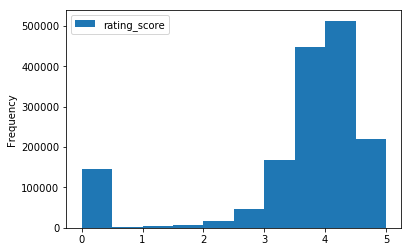

In [8]:
biggie[['rating_score']].plot(kind='hist')
plt.show()

In [14]:
sample_checkins = biggie.sample(1000)
sample_checkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1237851 to 601871
Data columns (total 27 columns):
Unnamed: 0                        1000 non-null int64
checkin_id                        1000 non-null int64
beer.bid                          1000 non-null int64
user.uid                          1000 non-null int64
rating_score                      1000 non-null float64
beer.beer_abv                     1000 non-null float64
brewery.brewery_name              1000 non-null object
beer.beer_name                    1000 non-null object
beer.beer_style                   1000 non-null object
brewery.brewery_id                1000 non-null int64
brewery.brewery_type              1000 non-null object
brewery.country_name              1000 non-null object
brewery.location.brewery_city     993 non-null object
brewery.location.brewery_state    987 non-null object
brewery.location.lat              1000 non-null float64
brewery.location.lng              1000 non-null float64
user.use

In [29]:
sample_checkins.reset_index(drop=True, inplace=True)
sample_checkins.head(3)

,Unnamed: 0,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,...,venue.categories.items,venue.location.lat,venue.location.lng,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at
0,112706,815404364,331215,2997378,0.0,5.5,Half Acre Beer Company,Pony,Pilsner - German,1862,...,"[{'category_key': 'pizza_place', 'category_nam...",47.6495,-122.349,Seattle,United States,WA,Food,7058052.0,NaN,"Thu, 10 Oct 2019 23:42:00 +0000"
1,46655,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000"
2,106882,801627521,2378624,72490,0.0,6.0,Peabody Heights Brewery,Abell Hands,Pale Ale - American,224255,...,"[{'category_key': 'seafood_restaurant', 'categ...",39.6043,-76.115,Port Deposit,United States,MD,Food,109538.0,NaN,"Fri, 06 Sep 2019 22:41:19 +0000"


In [54]:
sample_checkins.loc[0, 'venue.primary_category']

nan

In [35]:
pd.isnull(sample_checkins.loc[1, 'venue.categories.items'])

True

In [50]:
import ast  # the json_normalize() returned a string repr of a list, so need this to 'un-string' it

def venuecat(venuecell):
    if pd.isnull(venuecell):
        # empty list to eval to False
        return list()
    # list with primary category first
    try:
        venuecell = ast.literal_eval(venuecell)
        return [item['category_key'] for item in venuecell if item['is_primary']] + \
               [item['category_key'] for item in venuecell if not item['is_primary']]
    except TypeError:
        print(venuecell)
        return []
    

In [51]:
sample_checkins['venue.type'] = sample_checkins['venue.categories.items'].apply(lambda x: venuecat(x))

In [71]:
sample_checkins['rating_score'][55:65]

55    3.25
56    4.25
57    4.00
58    4.00
59    4.00
60    3.75
61    4.00
62    4.25
63    3.25
64    0.00
Name: rating_score, dtype: float64

In [73]:
sample_checkins.drop('venue.categories.items', inplace=True, axis=1)

In [74]:
sample_checkins.drop('Unnamed: 0', axis=1, inplace=True)

In [75]:
sample_checkins.head()

,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,...,venue.location.lat,venue.location.lng,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,venue.type
0,815404364,331215,2997378,0.0,5.5,Half Acre Beer Company,Pony,Pilsner - German,1862,Regional Brewery,...,47.6495,-122.3490,Seattle,United States,WA,Food,7058052.0,NaN,"Thu, 10 Oct 2019 23:42:00 +0000","[pizza_place, beer_bar]"
1,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000",[]
2,801627521,2378624,72490,0.0,6.0,Peabody Heights Brewery,Abell Hands,Pale Ale - American,224255,Micro Brewery,...,39.6043,-76.1150,Port Deposit,United States,MD,Food,109538.0,NaN,"Fri, 06 Sep 2019 22:41:19 +0000","[seafood_restaurant, american_restaurant]"
3,731686382,3123862,1417868,4.0,4.9,Backpocket Brewing,Kitty Lime Pie,Sour - Gose - Fruited,14975,Micro Brewery,...,42.0202,-91.6656,Cedar Rapids,United States,IA,Nightlife Spot,8731918.0,NaN,"Wed, 03 Apr 2019 20:42:36 +0000",[beer_bar]
4,467952253,594015,3473594,0.0,7.8,Toppling Goliath Brewing Co.,King Sue,IPA - Imperial / Double New England,7532,Micro Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wed, 21 Jun 2017 22:30:07 +0000",[]


In [76]:
# save to push to github for sample viewing
sample_checkins.to_csv('sample_checkins.csv')

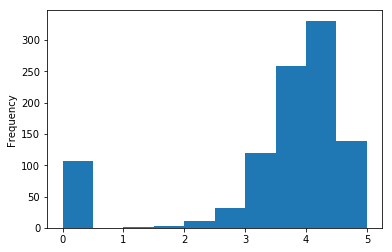

In [77]:
sample_checkins.rating_score.plot(kind='hist')

In [84]:
sum(sample_checkins['beer.beer_style'].apply(lambda x: x.startswith('IPA')))

487